# 1. 이상치 데이터 검증/확인

In [1]:
import json
import pandas as pd
from collections import defaultdict

# target_json = '/opt/ml/ocr_task/input/data/ICDAR17_Korean/ufo/train.json'
# target_images = '/opt/ml/ocr_task/input/data/ICDAR17_Korean/images'

target_json = '/opt/ml/ocr_task/dataset_revised/ufo/annotation.json'
target_images = '/opt/ml/ocr_task/dataset_revised/images'
category = {}
file_info = {}
make_frame = defaultdict(list)

# target 에 존재하는 train.json 파일을 엽니다.
with open(target_json, 'r') as f:
    json_datas = json.load(f) # python dict 처럼 접근하게끔 변환

    print(json_datas.keys())
    #dict_keys(['images'])

    # 이미지 정보 중 파일 경로와 아이디만 추출해서 file_info 에 저장
    for images_idx, images_item in enumerate(json_datas['images']):
        if images_idx == 0:
            print(images_item)
            print(json_datas['images'][images_item].keys())
            # 기본 데이터 : dict_keys(['img_h', 'img_w', 'words', 'tags', 'license_tag'])
            # 추가 데이터 : dict_keys(['paragraphs', 'words', 'chars', 'tags', 'relations', 'license_tag'])
            # 취합 데이터 양식 : dict_keys(['img_h', 'img_w', 'paragraphs', 'words', 'chars', 'tags', 'relations', 'license_tag'])

        if 'img_h' in json_datas['images'][images_item] and (isinstance(json_datas['images'][images_item]['img_h'], int) == False):
            print(json_datas['images'][images_item], json_datas['images'][images_item]['img_h'])
        
        if 'img_w' in json_datas['images'][images_item] and (isinstance(json_datas['images'][images_item]['img_w'], int) == False):
            print(json_datas['images'][images_item], json_datas['images'][images_item]['img_w'])

        if 'paragraphs' in json_datas['images'][images_item] and ((json_datas['images'][images_item]['paragraphs'] != None) and (len(json_datas['images'][images_item]['paragraphs']) != 0)):
            print(json_datas['images'][images_item]['paragraphs'])

        if 'chars' in json_datas['images'][images_item] and ((json_datas['images'][images_item]['chars'] != None) and (len(json_datas['images'][images_item]['chars']) != 0)):
            print(json_datas['images'][images_item]['chars'])

        if (json_datas['images'][images_item]['tags'] != None) and (len(json_datas['images'][images_item]['tags']) != 0):
            print(json_datas['images'][images_item]['tags'])
        
        if 'relations' in json_datas['images'][images_item] and ((json_datas['images'][images_item]['relations'] != None) and (len(json_datas['images'][images_item]['relations']) != 0)):
            print(json_datas['images'][images_item]['relations'])
        
        for words_idx, words_item in enumerate(json_datas['images'][images_item]['words']):
            if images_idx == 0 and words_idx == 0:
                print(json_datas['images'][images_item]['words'].keys())
            
            for each_ann_idx, each_ann_item in enumerate(json_datas['images'][images_item]['words'][words_item]):
                if images_idx == 0 and words_idx == 0 and each_ann_idx == 0:
                    print(json_datas['images'][images_item]['words'][words_item].keys())
                    # 기본 데이터 : dict_keys(['points', 'transcription', 'language', 'illegibility', 'orientation', 'word_tags'])
                    # 추가 데이터 : dict_keys(['points', 'transcription', 'language', 'illegibility', 'orientation', 'word_tags'])
                for each_ann_points_idx, (coordi_x, coordi_y) in enumerate(json_datas['images'][images_item]['words'][words_item]['points']):
                    if images_idx == 0 and words_idx == 0 and each_ann_idx == 0 and each_ann_points_idx == 0:
                        print(json_datas['images'][images_item]['words'][words_item]['points'])
                    
                    if len(json_datas['images'][images_item]['words'][words_item]['points']) % 2 != 0:
                        # print(images_item, words_item, len(json_datas['images'][images_item]['words'][words_item]['points']))
                        break
                    
                    if (coordi_x < 0) or (coordi_y < 0):
                        print(images_item, words_item, "(", json_datas['images'][images_item]['words'][words_item]['points'], ")")                       
                    
                if (json_datas['images'][images_item]['words'][words_item]['transcription'] != None) and\
                    (" " in json_datas['images'][images_item]['words'][words_item]['transcription']):
                    # print(images_item, words_item, json_datas['images'][images_item]['words'][words_item]['transcription'])
                    break

                break
            break

        if (json_datas['images'][images_item]['tags'] != None) and (len(json_datas['images'][images_item]['tags']) != 0):
            print(json_datas['images'][images_item]['tags'])

        break
# df

dict_keys(['images'])
14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG
dict_keys(['paragraphs', 'words', 'chars', 'tags', 'relations', 'license_tag'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'])
dict_keys(['points', 'orientation', 'transcription', 'word_tags', 'language', 'illegibility'])
[[67.5, 356.67], [802.5, 356.67], [802.5, 520.0], [67.5, 520.0]]


# 2. Data 정제 및 json 저장

In [1]:
import json
import pandas as pd
from collections import defaultdict

from PIL import ImageOps, Image
import os
import os.path as osp
import shutil


In [2]:
merge_dataset_path = '/opt/ml/input/data/merge_dataset'
!rm -r {merge_dataset_path}

/opt/ml/input/data/dataset/images/1632025728267-3.jpg
4032 3024
3024 4032


TypeError: 'AxesSubplot' object is not subscriptable

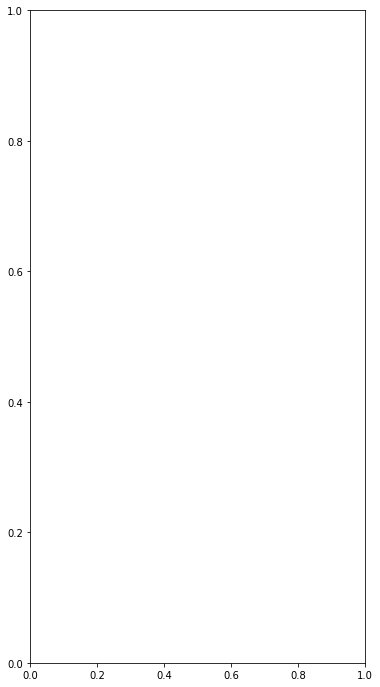

In [25]:
import matplotlib.pyplot as plt
merge_dataset_path = '/opt/ml/input/data/dataset'
image_fpath = os.path.join(merge_dataset_path, "images", '1632025728267-3.jpg')
print(image_fpath)
pil = Image.open(image_fpath)
width, height = pil.size
print(width, height)
pil_new = ImageOps.exif_transpose(pil)
#PIL.ImageOps.exif_trasnpose

print(pil_new.width, pil_new.height)
fig, axes = plt.subplots(1,1, figsize=(6,12))

#axes[0].set_title("Pillow")
#axes[0].axis("off")
axes[0].imshow(pil)

In [3]:
def makedirs(path):
    try:
        os.makedirs(path)
    except OSError:
        print(f"Directory is already exist.({path})")
        if not os.path.isdir(path): 
            raise

makedirs(osp.join(merge_dataset_path, 'images'))
makedirs(osp.join(merge_dataset_path, 'ufo'))

In [34]:
def stack_json_data(target_json, target_images, merge_dataset_path):
    category = {}
    file_info = {}
    make_frame = defaultdict(list)

    
    # target 에 존재하는 train.json 파일을 엽니다.
    with open(target_json, 'r') as f:
        json_datas = json.load(f) # python dict 처럼 접근하게끔 변환

        # 이미지 정보 중 파일 경로와 아이디만 추출해서 file_info 에 저장
        for images_idx, images_item in enumerate(json_datas['images']):
            new_image_info = dict()
            
            if ('img_h' not in json_datas['images'][images_item]) or ('img_w' not in json_datas['images'][images_item]):
                load_image = Image.open(osp.join(target_images, images_item))
                load_image = ImageOps.exif_transpose(load_image)
                new_image_info['img_w'] = load_image.width
                new_image_info['img_h'] = load_image.height
            else:
                if (isinstance(json_datas['images'][images_item]['img_h'], int) == False) or (isinstance(json_datas['images'][images_item]['img_h'], int) == False):
                    load_image = Image.open(osp.join(target_images, images_item))
                    load_image = ImageOps.exif_transpose(load_image)
                    new_image_info['img_w'] = load_image.width
                    new_image_info['img_h'] = load_image.height
                else:
                    new_image_info['img_h'] = json_datas['images'][images_item]['img_h']
                    new_image_info['img_w'] = json_datas['images'][images_item]['img_w']
                
            new_image_info['paragraphs'] = dict()
            new_image_info['words'] = dict()
            
            normal_index = 0
            if len(json_datas['images'][images_item]['words']) == 0:
                continue

            for words_item in json_datas['images'][images_item]['words']:
                for each_ann_idx, each_ann_item in enumerate(json_datas['images'][images_item]['words'][words_item]):
                    isError = False
                    each_word_info = dict()
                    
                    # illegibility가 False 이면서, transcription 이 Null 인 경우 제거
                    if (json_datas['images'][images_item]['words'][words_item]['illegibility'] == False) and \
                        (json_datas['images'][images_item]['words'][words_item]['transcription'] == None):
                        continue

                    # point가 4개 미만이면 제거
                    if len(json_datas['images'][images_item]['words'][words_item]['points']) < 4:
                        continue
                    
                    # point 개수가 홀수면 제거
                    if len(json_datas['images'][images_item]['words'][words_item]['points']) % 2 != 0:
                        continue
                    
                    new_points = []
                    # 좌표 값 오류 수정 작업 (대상 : 0보다 작거나 Image Size 보다 큰 경우)
                    for each_ann_points_idx, (coordi_x, coordi_y) in enumerate(json_datas['images'][images_item]['words'][words_item]['points']):
                        if coordi_x < 0:
                            coordi_x = 0
                            error_images.append(images_item)
                        elif coordi_x > new_image_info['img_w']:
                            coordi_x = new_image_info['img_w']
                            error_images.append(images_item)

                        if coordi_y < 0:
                            coordi_y = 0
                            error_images.append(images_item)
                        elif coordi_y > new_image_info['img_h']:
                            coordi_y = new_image_info['img_h']
                            error_images.append(images_item)
                        
                        new_points.append([coordi_x, coordi_y])
                    
                    each_word_info['points'] = new_points
                    
                    # 공백이 있는 transcription 일 경우 제거
                    # if " " in json_datas['images'][images_item]['words'][words_item]['transcription']:
                    #     continue

                    each_word_info['transcription'] = json_datas['images'][images_item]['words'][words_item]['transcription']
                    each_word_info['language'] = json_datas['images'][images_item]['words'][words_item]['language']
                    each_word_info['illegibility'] = json_datas['images'][images_item]['words'][words_item]['illegibility']
                    each_word_info['orientation'] = json_datas['images'][images_item]['words'][words_item]['orientation']
                    each_word_info['word_tags'] = json_datas['images'][images_item]['words'][words_item]['word_tags']

                    new_image_info['words'][normal_index] = each_word_info
                    normal_index += 1

            # 정제 후 Point가 1개도 없으면 제거
            if len(new_image_info['words']) == 0:
                continue
            
            new_image_info['chars'] = dict()
            new_image_info['tags'] = dict()
            new_image_info['relations'] = dict()
            new_image_info['license_tag'] = json_datas['images'][images_item]['license_tag']
            new_info['images'][images_item] = new_image_info

            shutil.copyfile(osp.join(target_images, images_item), osp.join(merge_dataset_path + '/images', images_item))

In [35]:
new_info = dict()
new_info['images'] = dict()
error_images = []

In [36]:
# 기본 제공 dataset 에 대한 json 전처리(Format 통일, 오류 제거, Noise 수정) 후 저장 (+ 해당되는 Image 복사)
target_json = '/opt/ml/input/data/ICDAR17_Korean_base/ufo/train.json'
target_images = '/opt/ml/input/data/ICDAR17_Korean_base/images'
stack_json_data(target_json, target_images, merge_dataset_path)

# 추가 dataset 에 대한 json 전처리(Format 통일, 오류 제거, Noise 수정) 후 저장 (+ 해당되는 Image 복사)
target_json = '/opt/ml/input/data/dataset/annotation.json'
target_images = '/opt/ml/input/data/dataset/images'
stack_json_data(target_json, target_images, merge_dataset_path)

In [10]:
with open(osp.join(merge_dataset_path, 'ufo/merge_dataset.json'), 'w') as outfile:
    json.dump(new_info, outfile, indent=2)


In [30]:
len(new_info['images'])

2071

In [7]:
error_images = set(error_images)
len(error_images)

245

In [11]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cv2

def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann


In [12]:
# get camper data
camper_data = read_json("/opt/ml/input/data/merge_dataset/ufo/merge_dataset.json")  # FIXME

# https://pandas.pydata.org/docs/user_guide/merging.html?highlight=group#concatenating-objects
image_names = []
words_dfs = []
words_dfs_1 = []
words = []
for key, value in camper_data['images'].items():
    image_names.append(key)
    words.append(value['words'])
    words_dfs.append(pd.DataFrame(value['words']).T) # words 안에 값들을 Transpose

# dataframe으로 변경 keys + words
df = pd.concat(words_dfs, keys = image_names)

# https://pandas.pydata.org/docs/user_guide/advanced.html
df['image_name'] = df.index.get_level_values(0) # keys index를 가져옴
df['points_id'] = df.index.get_level_values(1).astype(int) # word index를 가져옴

df.index = (_ for _ in range(len(df))) # key값 없앰

legible_df = df.loc[df.illegibility == False] # illegible한 points는 무시합니다.
illegible_df = df.loc[df.illegibility == True] # illegible한 points만 변경합니다.

df

,points,transcription,language,illegibility,orientation,word_tags,image_name,points_id
0,"[[662.0, 747.0], [945.0, 759.0], [922.0, 1582....",출입금지,[ko],False,Horizontal,None,img_4380.jpg,0
1,"[[662.0, 747.0], [945.0, 759.0], [922.0, 1582....",출입금지,[ko],False,Horizontal,None,img_4380.jpg,1
2,"[[662.0, 747.0], [945.0, 759.0], [922.0, 1582....",출입금지,[ko],False,Horizontal,None,img_4380.jpg,2
3,"[[662.0, 747.0], [945.0, 759.0], [922.0, 1582....",출입금지,[ko],False,Horizontal,None,img_4380.jpg,3
4,"[[662.0, 747.0], [945.0, 759.0], [922.0, 1582....",출입금지,[ko],False,Horizontal,None,img_4380.jpg,4
...,...,...,...,...,...,...,...,...
207091,"[[554.67, 3132.33], [594.67, 3132.33], [594.67...",U,[Others],False,Horizontal,None,IMG_5464.jpeg,223
207092,"[[554.67, 3132.33], [594.67, 3132.33], [594.67...",U,[Others],False,Horizontal,None,IMG_5464.jpeg,224
207093,"[[554.67, 3132.33], [594.67, 3132.33], [594.67...",U,[Others],False,Horizontal,None,IMG_5464.jpeg,225
207094,"[[554.67, 3132.33], [594.67, 3132.33], [594.67...",U,[Others],False,Horizontal,None,IMG_5464.jpeg,226


In [21]:
def plot_polyBoxes(_ax, image_name, image_dir_path='/opt/ml/input/data/ICDAR17_Korean/images'):
    image_path = f"{image_dir_path}/{image_name}"
    assert Path(image_dir_path).exists(), "이미지 dir 경로를 확인하세요."
    assert Path(image_path).exists(), "이미지 파일명을 확인하세요."
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    anns = df.loc[df.image_name == image_name, 'points']
    
    # 황인재_T2247 캠퍼님 글 참조.
    for ann in anns:
        img = cv2.polylines(img, np.array([ann], dtype=np.int32), True, (255,0,0), 10)
    _ax.imshow(img)
    _ax.axis('off')

def make_annotation(image_name, image_dir_path='/opt/ml/input/data/dataset/images'):
    image_path = f"{image_dir_path}/{image_name}"
    assert Path(image_dir_path).exists(), "이미지 dir 경로를 확인하세요."
    assert Path(image_path).exists(), "이미지 파일명을 확인하세요."

In [23]:
helper = 5

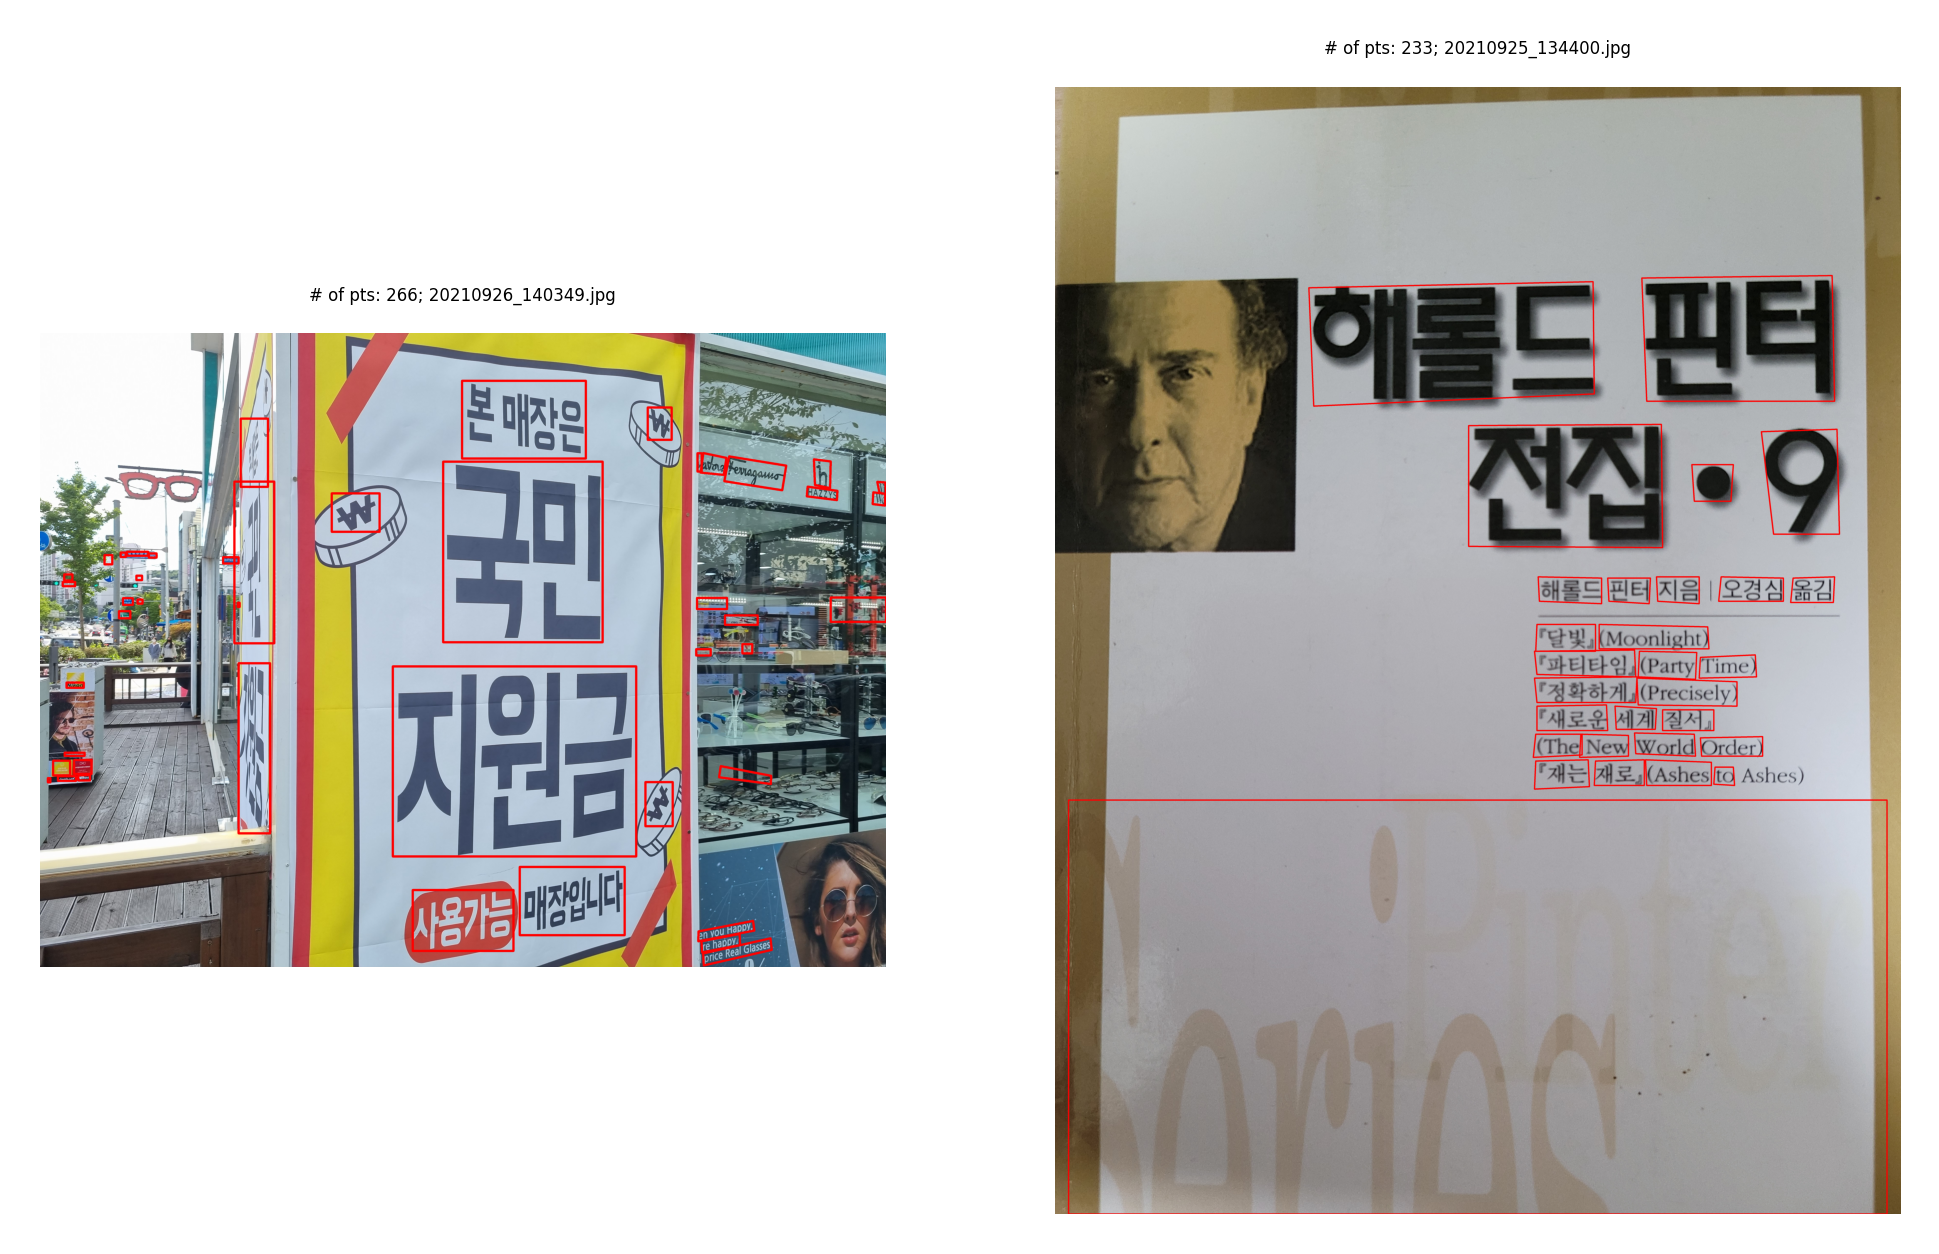

In [28]:
fig, axes = plt.subplots(1, 2, dpi=400)
error_images = list(error_images)
for i in range(helper, helper+1):
    plot_polyBoxes(axes[0], error_images[i])
    axes[0].set_title(f'# of pts: 266; {error_images[i]}', size=3)
    plot_polyBoxes(axes[1], error_images[i+1])
    axes[1].set_title(f'# of pts: 233; {error_images[i+1]}', size=3)
helper += 2

In [7]:
print(len(new_info['images']))

2071


In [8]:
with open(osp.join(merge_dataset_path, 'ufo/merge_dataset.json'), 'w') as outfile:
    json.dump(new_info, outfile, indent=2)